# IVY NJERI NJOROGE

# SYRIATEL

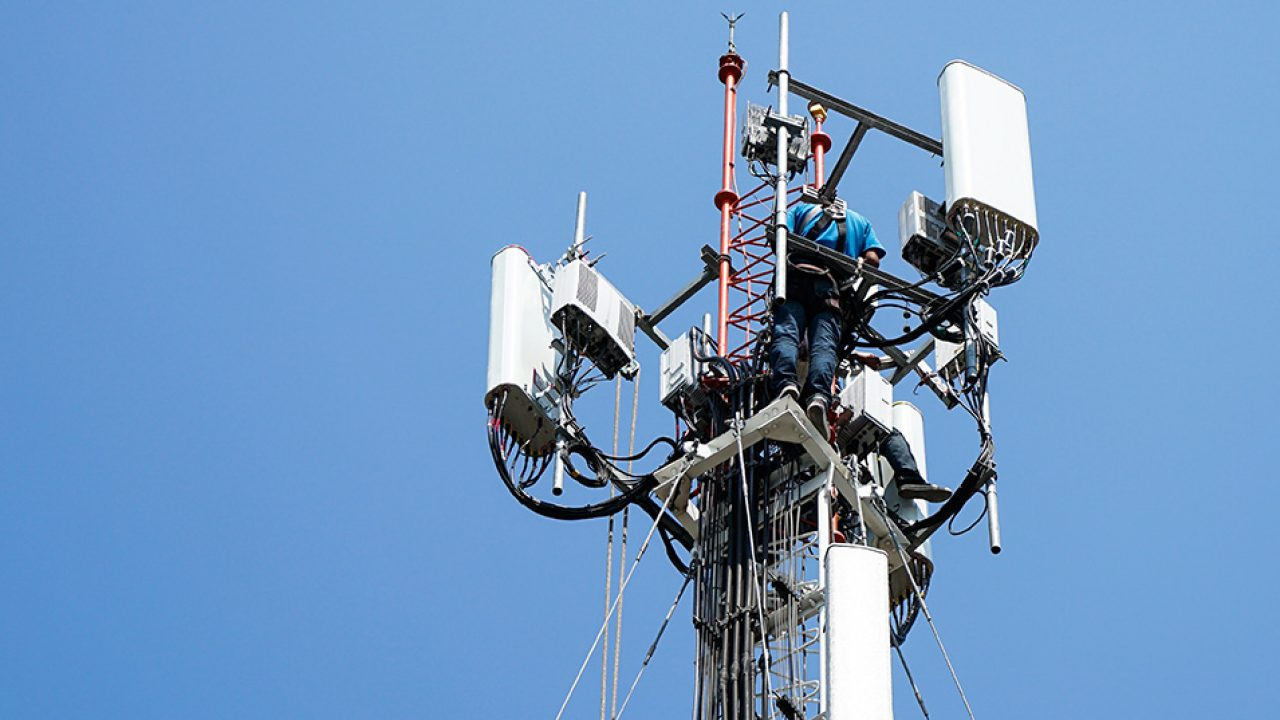

# BUSINESS UNDERSTANDING

SyriaTel is a telecommunications company looking to combat customer churn. The company provided client data in order to better understand whether a consumer would stop doing business with the company. The CRISP-DM methodology will be used to analyze the dataset and prepare it for machine learning algorithms that will classify feature importance. Selected features will be used to give business insight and reduce customer churn. A vast majority of companies suffer from customer churn - the loss of customers to competition. This can be incredibly damaging to a company's profitability as they might have spent hundreds/thousands of dollars to acquire new customers. When a customer leaves, the company is not only losing out on potential revenue but also the considerable resources spent in acquiring the customers are lost. Telecommunication companies are no exception. My goal is to create a machine learning model that can help predict whether a customer will churn given certain data about their usage, in order to be able to more efficiently direct customer retention efforts towards at-risk customers.

# DATA UNDERSTANDING

I shall be using the SyriaTel Customer Churn dataset downloaded from Kaggle. This is a public dataset contained in a CSV file that details customer usage patterns and also includes a column delineating whether the customer has churned or not. The nature of the 'churn' column lends the dataset towards a binary classification problem, where a machine learning model can be constructed and trained on the data to predict whether a customer will churn or not given their usage patterns. The 'churn' column will be used as our target column in this binary classification problem. The dataset contains 3333 rows and 21 columns giving details about each datapoint.<br>

The features include;<br>

state - State where the customer resides<br>
account length - period the customer has been subscribed to the service<br>
area code - area code of the customer<br>
phone number - clients phone number<br>
international plan - indicates if the customer has an international plan or not<br>
voice mail plan - indicates if the client has a voice mail plan or not<br>
number vmail messages - number of voice mail messages<br>
total day minutes, calls, charge - total minutes, calls and charge of the customer in the day<br>
total eve minutes, calls, charge - total minutes, calls and charge of the customer in the evening<br>
total night minutes, calls, charge - total minutes, calls and charge of the customer in the night<br>
total intl minutes, calls, charge - total international minutes, calls and charge of the customer.<br>
customer service calls - number of calls made to the customer service<br>
churn - our target

# DATA PREPARATION

# Imports and Data Loading

I will import all the necessary libraries that will allow me to successfully undertake this project.

In [1]:
#Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Parsing through the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


I have read the dataset into a dataframe and assigned the variable name "df".

In [3]:
#checking the shape of the dataset
df.shape

(3333, 21)

This shows that the dataset has 3333 rows and 21 columns

In [4]:
#desribing the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


This describes the data by showing the count, mean, standard deviation, maximum and minimum values, and the quartiles of the numerical data in the dataset.

In [5]:
#checking for duplicates
df.duplicated().sum()

0

There are no duplicated values. I shall then check for missing values.

In [6]:
#checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in any of the columns.

In [7]:
#checking data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

This shows that the data set has 4 data types: objects, floats, integers and boolean values.

# Exploratory Data Analysis (EDA)

In trying to understand our data better, let's check for the distribution of the individual features in our dataset.<br>

Questions to answer:<br>

What is the distribution of Expenditure by Time of the day?<br>
What is the distribution of Revenue by State?<br>
What is the distribution of revenue by Area Codes?<br>
What is the relationship between account length and Expenditure?<br>
What is the relationship between having a plan and expenditure?<br>

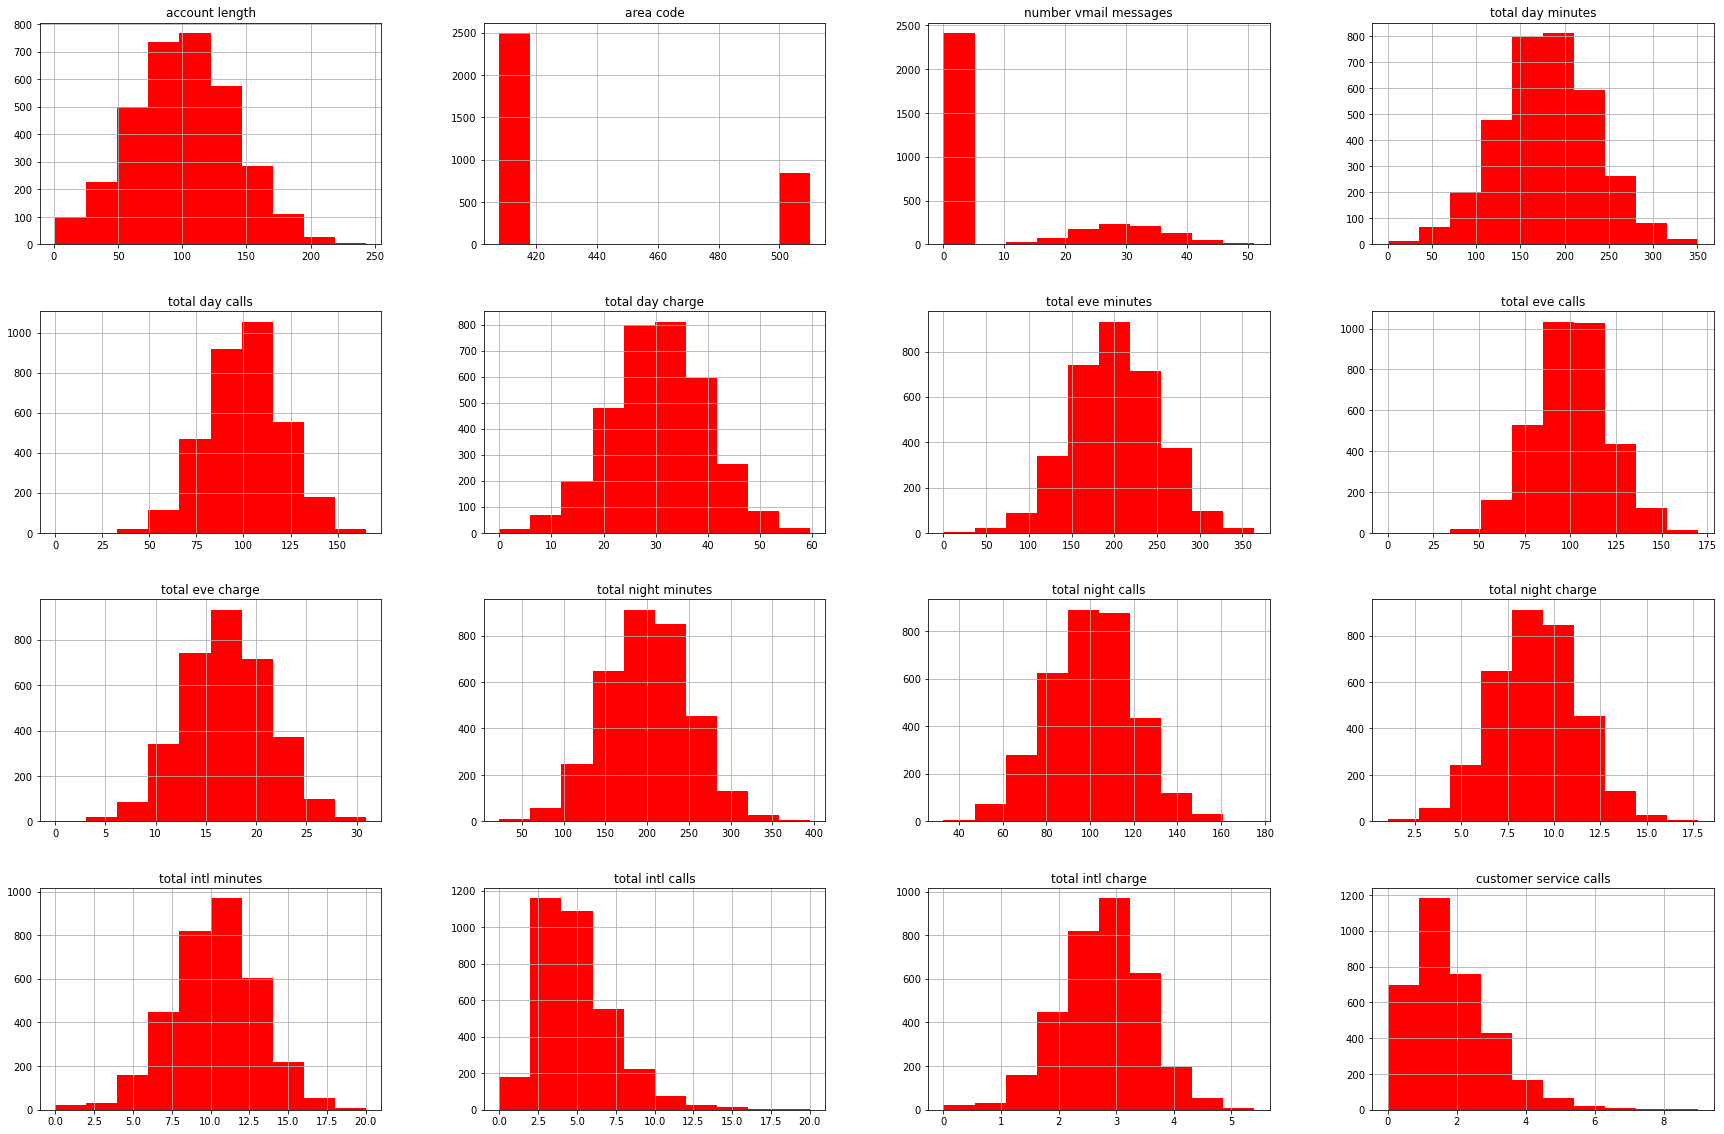

In [8]:
#Checking for Distribution of Data in the dataset
df2 = df.drop(columns='churn')
df2.hist(figsize=(30,20), color = 'red')
plt.show();

From a glance, I can see that the distribution is mostly symmetrical.

In [9]:
numeric_cols = ['account length',
                'number vmail messages',
                'total day minutes',
                'total day calls',
                'total day charge',
                'total eve minutes',
                'total eve calls',
                'total eve charge',
                'total night minutes',
                'total night calls',
                'total night charge',
                'total intl minutes',
                'total intl calls',
                'total intl charge',
                'customer service calls']

categoric_cols = ['state','area code',
                  'international plan',
                  'voice mail plan']

<AxesSubplot:title={'center':'Count of customers who churned or not'}>

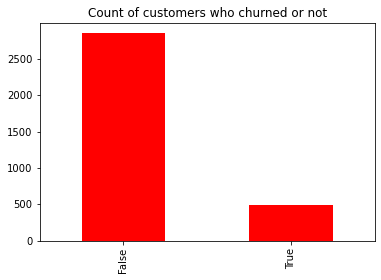

In [10]:
df['churn'].value_counts().plot(kind='bar', color='red', title='Count of customers who churned or not')

From the data provided, a majority of the customers have not churned.

In [11]:
#grouping the dataset by area code
area_df = df.groupby('area code')

<AxesSubplot:title={'center':'Count of churn per area code'}, ylabel='area code,churn'>

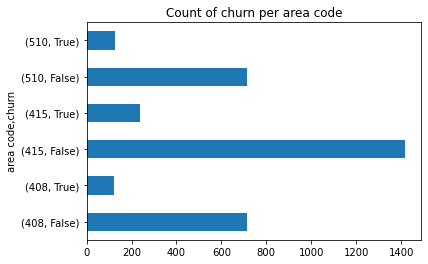

In [12]:
#plotting number of churns per area
area_df['churn'].value_counts().plot(kind='barh', title='Count of churn per area code')

People from area code 415 recorded the highest churning rate while those from area code 408 recorded the lowest.

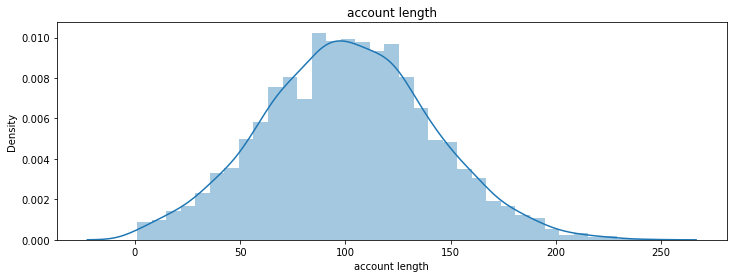

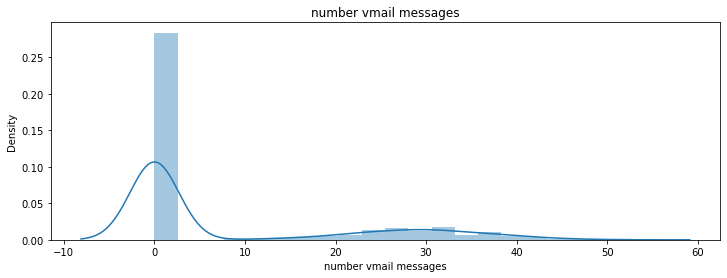

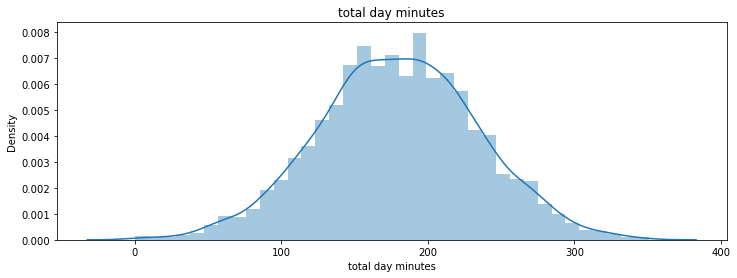

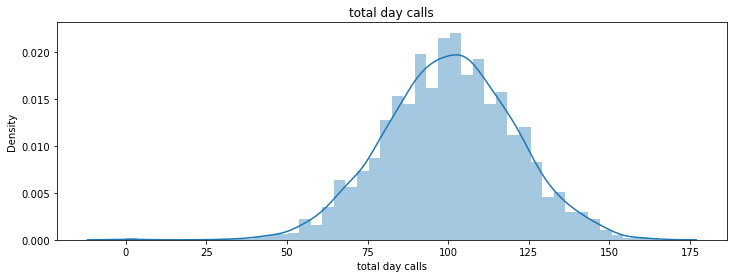

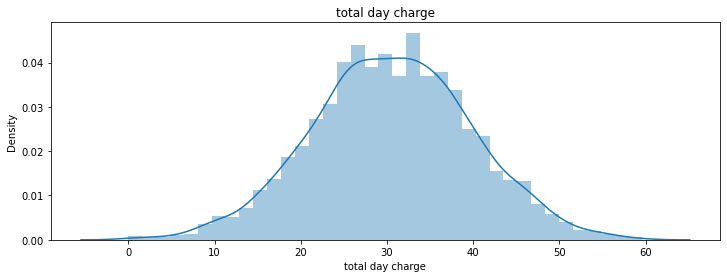

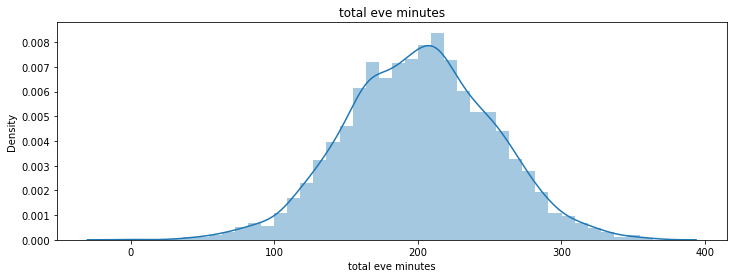

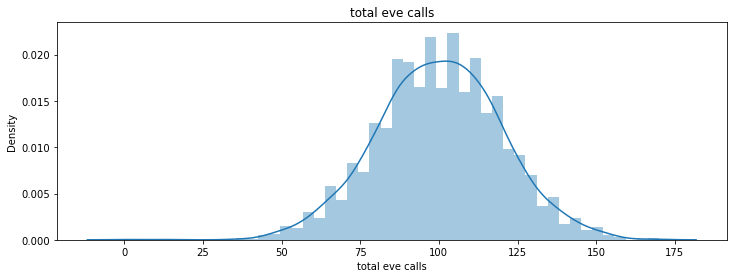

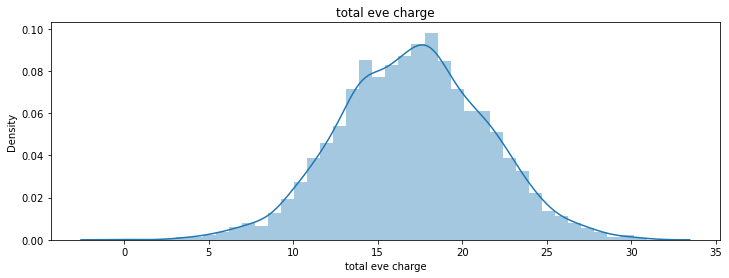

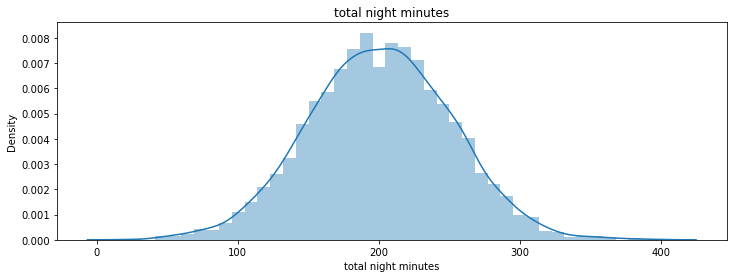

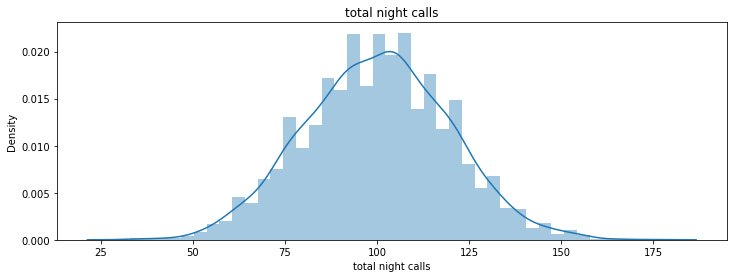

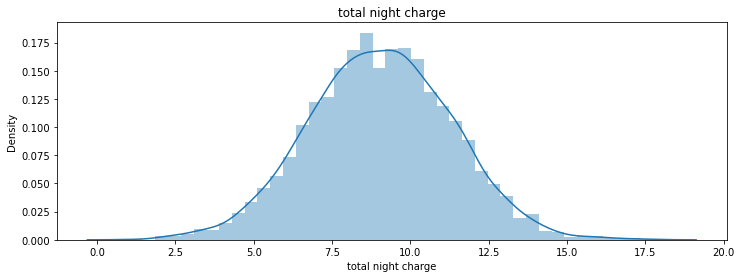

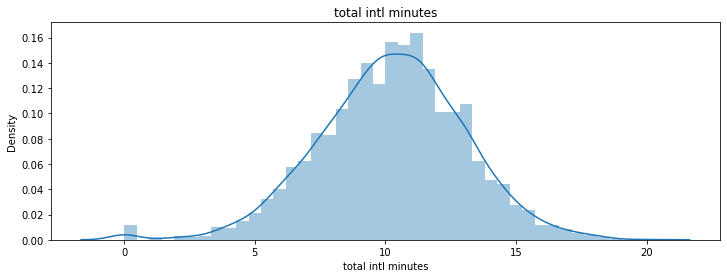

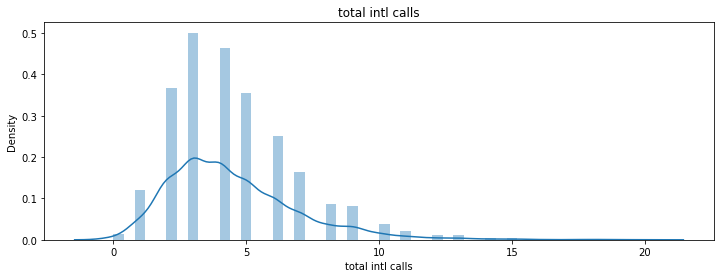

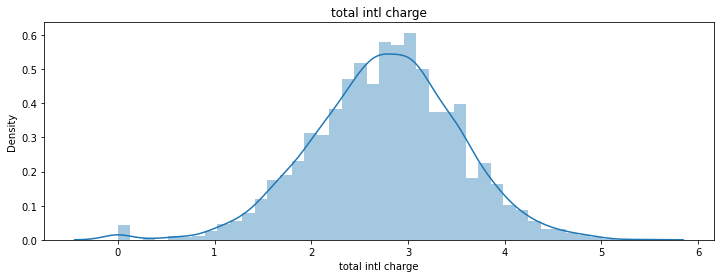

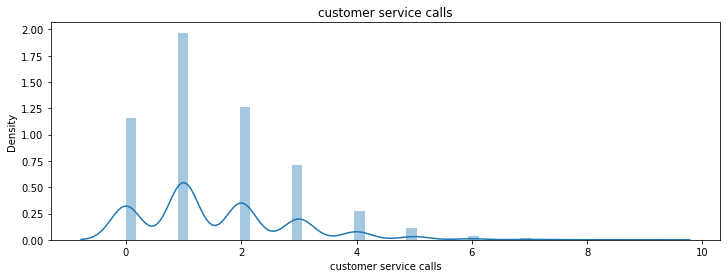

In [49]:
for i in df[numeric_cols]:
  print("\n")
  plt.figure(figsize=(12,4))
  sns.distplot(df[i]).set(title = i)
  plt.show()

International plans charge the highest 

In [14]:
#grouping the dataset with the international plan
intl_plan = df.groupby('international plan')

<AxesSubplot:title={'center':'International plan per area code'}, xlabel='international plan,area code'>

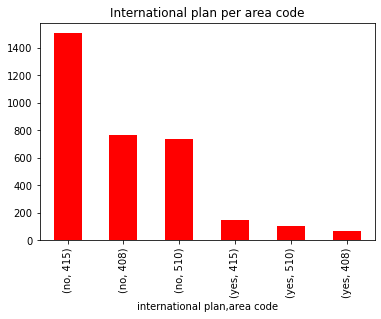

In [15]:
#plotting area with international plan

intl_plan['area code'].value_counts().plot(kind='bar', color='red', title='International plan per area code')

Area code 415 recorded the highest number of international plan subscribers who did not churn.

In [16]:
#grouping the dataset with churn

churn_df = df.groupby('churn')

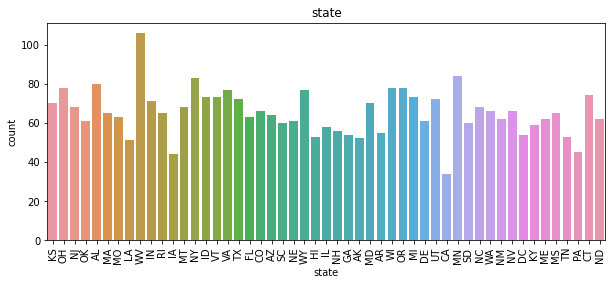

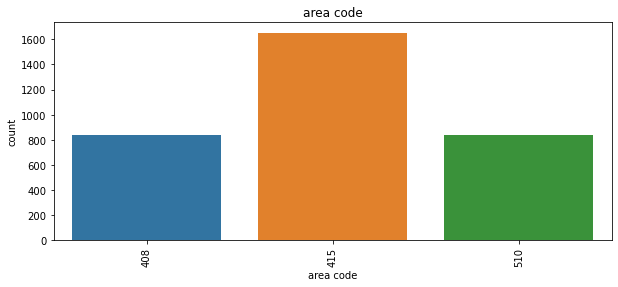

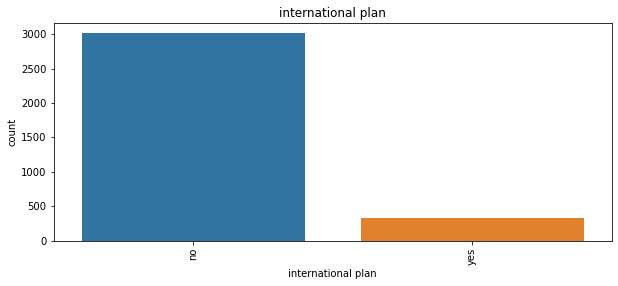

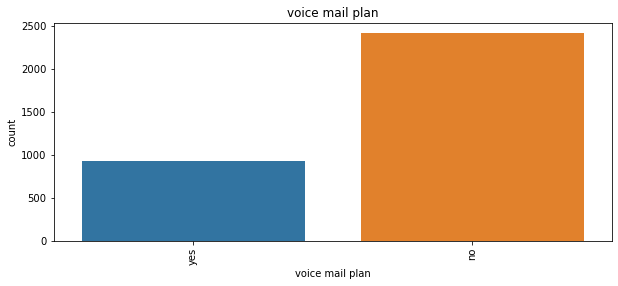

In [51]:
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, data=df).set(title = i)
    plt.xticks(rotation=90)
    plt.show()

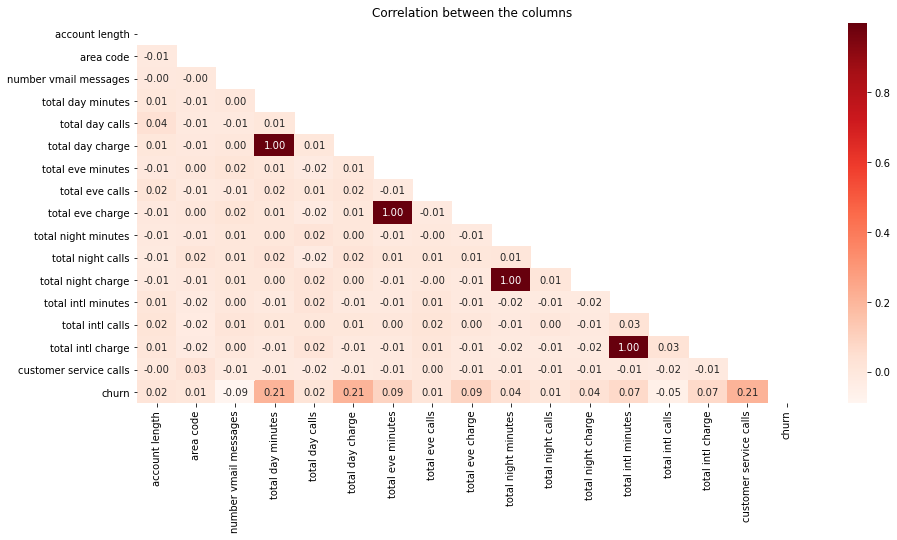

In [18]:
#correlation heatmap
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

There exists a strong correlation between the "total day charge" to "total day minutes", "total eve charge" to "total eve minutes", "total night charge" to "total night minutes", and "total international charge" to "total international minutes" columns.

# MODELLING

### Splitting of Data

In [19]:
X = df.drop(columns=['churn', 'phone number'])
y = df['churn']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [21]:
print('X_train = ',X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ',y_test.shape)

X_train =  (2333, 19)
X_test =  (1000, 19)
y_train =  (2333,)
y_test =  (1000,)


In [22]:
y_train = y_train.astype(float)

In [23]:
#Tranforming the data
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder , StandardScaler

le = LabelEncoder()
X_train['state'] = le.fit_transform(X_train['state'])
X_test['state'] = le.fit_transform(X_test['state'])

X_train['international plan'] = le.fit_transform(X_train['international plan'])
X_test['international plan'] = le.fit_transform(X_test['international plan'])
X_train['voice mail plan'] = le.fit_transform(X_train['voice mail plan'])
X_test['voice mail plan'] = le.fit_transform(X_test['voice mail plan'])


In [24]:
# Instantiate Standard Scaler
ss = StandardScaler()

# fit and transform train data
X_train_scaled = ss.fit_transform(X_train)

# Transform test data
X_test_scaled = ss.transform(X_test)

# Convert back scaled data into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

### Baseline Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_curve, auc, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

In [26]:
logreg = LogisticRegression(random_state = 42)
d_tree = DecisionTreeClassifier(random_state = 42)
knn = KNeighborsClassifier()
forest = RandomForestClassifier(random_state = 42)

In [27]:
# Create a function for classification
train_accuracy = []
test_accuracy = []
model_list = [logreg, d_tree, knn, forest]
for i in model_list:
    i = i.fit(X_train_scaled, y_train)
    ytrain_pred = i.predict(X_train_scaled)
    ytest_pred = i.predict(X_test_scaled)
    train_accuracy.append(accuracy_score(ytrain_pred, y_train))
    test_accuracy.append(accuracy_score(ytest_pred, y_test))

In [28]:
print('Training accuracy')
print(train_accuracy)
print('-------------------')
print('Test accuracy')
print(test_accuracy)

Training accuracy
[0.8606943849121304, 1.0, 0.9198456922417488, 1.0]
-------------------
Test accuracy
[0.861, 0.908, 0.88, 0.948]


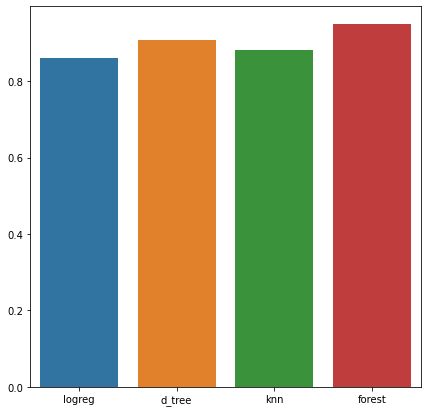

In [29]:
#visualizing the test accuracy results
model_names = ["logreg","d_tree","knn", 'forest']
plt.figure(figsize = (7, 7))
sns.barplot(x = model_names, y = test_accuracy)
plt.show()

## 1. Logistic Regression

In [30]:
#Fitting the model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [31]:
# Get prediction
ytrain_pred= logreg.predict(X_train_scaled)
ytest_pred = logreg.predict(X_test_scaled)

# Check the accuracy score
print('training accuracy', accuracy_score(y_train, ytrain_pred))
print('test accuracy', accuracy_score(y_test, ytest_pred))

training accuracy 0.8606943849121304
test accuracy 0.861


### SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

# #Using SMOTE to remove class imbalances
sm = SMOTE(random_state=42)

# Fit and transform X_train_scaled and y_train using sm
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

print(y_train_smote.value_counts())

1.0    1993
0.0    1993
Name: churn, dtype: int64


In [33]:
# insantiating the model with the best parameters from grid search
lr_smote = logreg

# fitting the model to the smote train

lr_smote.fit(X_train_smote, y_train_smote)

# Get prediction
ytest_pred = lr_smote.predict(X_test_scaled)

# Check the accuracy score
accuracy_score(y_test, ytest_pred)

0.768

### Output of the Logistic regression models

Accuracy of first model: 85.9 <br>
Accuracy of second model: 86.1 (performed best)<br>
Accuracy of third model: 76.8

## 2. Decision Tree

In [34]:
#Using GridSearchCV
# Setting tuning parameters
par={
    'max_depth':[2, 4, 5, 10],
    'min_samples_leaf': [5, 15, 20, 50],
    'min_samples_split': [10, 20, 30, 40],
    'criterion':['gini','entropy']
}

In [35]:
#Instantiating the grid search
dt = DecisionTreeClassifier()
g_search = GridSearchCV(estimator = dt,
                      param_grid = par,
                      scoring = 'accuracy', cv=5)

In [36]:
#Fitting grid search
g_search.fit(X_train, y_train)

# Getting best parameters
dt1 = g_search.best_estimator_
dt1

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [37]:
# Instatiate desicion tree and Appling best parameters
dt1 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5, min_samples_split=10, random_state = 42)
dt1.fit(X_train_scaled, y_train)
y_pred = dt1.predict(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label = 2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
acc_dt1 = (accuracy_score(y_pred, y_test))
acc_dt1

0.936

In [38]:
# Instatiate desicion tree and Appling best parameters
dt2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5, random_state = 42)
dt2.fit(X_train_scaled, y_train)
y_pred2 = dt1.predict(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2, pos_label = 2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
acc_dt2 = (accuracy_score(y_pred2, y_test))
acc_dt2

0.936

### Output of the dt models

Accuracy of first model: 90.8 <br>
Accuracy of second model: 93.6<br>
Accuracy of third model: 93.6

## 3. KNearest Neighbors (KNN)

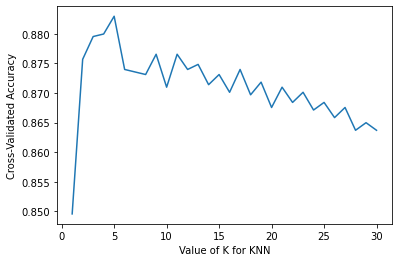

In [39]:
#Use cross val score for scoring(good for regression)
k_range = range(1, 31)
k_scores = []# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [40]:
#Modelling with the tuned parameters
knn1 = KNeighborsClassifier(n_neighbors=5)
#fitting the training set
knn1.fit(X_train_scaled, y_train)
y_pred_knn = knn1.predict(X_test_scaled)

knn_acc = accuracy_score(y_pred_knn, y_test)
knn_acc

0.88

### Output of the KNN models

Accuracy of first model: 87.1 <br>
Accuracy of second model: 88 <br>

## 4. Random Forest

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [42]:
# Use the random grid to search for best hyperparameters
# creating the base model to tune

forest= RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# searching across 100 different combinations using all available cores
forest_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
forest_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 14, 18, 23, 27, 32,
                                                         36, 41, 45, 50]},
                   random_state=42, verbose=2)

In [43]:
forest_random.best_params_

{'n_estimators': 41,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [44]:
# Instantiate and fit a RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators = 45, min_samples_split = 2, 
                                 min_samples_leaf = 2, max_features = 'auto', max_depth = 80, bootstrap = True)
forest1.fit(X_train, y_train)
#ytrain_pred = forest1.predict(X_train)

# Training accuracy score
print('Train:', forest1.score(X_train_scaled, y_train))
print()
print('Test:', forest1.score(X_test_scaled, y_test))

Train: 0.8559794256322332

Test: 0.856


### Output of the Random Forest models

Accuracy of first model: 84.6 <br>
Accuracy of second model: 83 <br>

# EVALUATION

### Final model

The model to use in the evaluation is the **Decision Tree** because it outputs the best accuracy.

In [45]:
dt_final = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5, min_samples_split=10, random_state = 42)

In [46]:
dt_final.fit(X_train_scaled, y_train)
y_pred = dt_final.predict(X_test_scaled)

In [47]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label = 2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
acc_dt1 = (accuracy_score(y_pred, y_test))
acc_dt1

0.936

In [48]:
pred = pd.DataFrame({
        "Predicted_Churn": y_pred.astype(bool),
        'Churn': y_test
    },
    index = y_test.index)
pred

,Predicted_Churn,Churn
438,False,False
2674,False,False
1345,True,True
1957,False,False
2148,False,False
...,...,...
3080,False,False
2548,False,False
2916,False,False
2655,False,False


# CONCLUSION, RECOMMENDATIONS AND NEXT STEPS


# Recommendations